In [2]:
import json
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
with open('imdbscraping/imdbscraping/spiders/data.json') as f:
    movie_data = json.loads(f.read())
df = pd.DataFrame(movie_data)
print (df.head(20))

                                                 cast  \
0   [ Anthony Perkins\n,  Vera Miles\n,  John Gavi...   
1   [ Tim Robbins\n,  Morgan Freeman\n,  Bob Gunto...   
2   [ Ellen Burstyn\n,  Matthew McConaughey\n,  Ma...   
3   [ Virginia Cherrill\n,  Florence Lee\n,  Harry...   
4   [ Charles Chaplin\n,  Paulette Goddard\n,  Hen...   
5   [ Claudia Cardinale\n,  Henry Fonda\n,  Jason ...   
6   [ Tom Hanks\n,  Tom Sizemore\n,  Edward Burns\...   
7   [ Tom Hanks\n,  David Morse\n,  Bonnie Hunt\n,...   
8   [ Rumi Hiiragi\n,  Miyu Irino\n,  Mari Natsuki...   
9   [ Stephen Baldwin\n,  Gabriel Byrne\n,  Benici...   
10  [ Shameik Moore\n,  Jake Johnson\n,  Hailee St...   
11  [ Jean Reno\n,  Gary Oldman\n,  Natalie Portma...   
12  [ Roberto Benigni\n,  Nicoletta Braschi\n,  Gi...   
13  [ James Stewart\n,  Donna Reed\n,  Lionel Barr...   
14  [ Ryan O'Neal\n,  Tatum O'Neal\n,  Madeline Ka...   
15  [ Johnny Depp\n,  Geoffrey Rush\n,  Orlando Bl...   
16  [ Ajay Devgn\n,  Shriya Sar

In [4]:
genre_count = dict()
for index, row in df.iterrows():
    for each in row['genre']:
        if each.strip() in genre_count:
            genre_count[each.strip()] = (genre_count[each.strip()][0] + 1,genre_count[each.strip()][1] + float(row['rating']))
        else:
            genre_count[each.strip()] = (1,float(row['rating']))
for each in genre_count:
    genre_count[each] = (genre_count[each][0],genre_count[each][1]/genre_count[each][0])
print (genre_count)

{'Horror': (5, 8.32), 'Mystery': (33, 8.287878787878789), 'Thriller': (61, 8.283606557377047), 'Drama': (184, 8.30543478260871), 'Adventure': (56, 8.31785714285714), 'Sci-Fi': (31, 8.338709677419354), 'Comedy': (48, 8.262499999999998), 'Romance': (28, 8.257142857142858), 'Family': (24, 8.304166666666669), 'Western': (8, 8.35), 'War': (30, 8.306666666666667), 'Crime': (52, 8.332692307692307), 'Fantasy': (32, 8.325), 'Animation': (20, 8.3), 'Action': (32, 8.350000000000001), 'Musical': (3, 8.266666666666667), 'History': (19, 8.25263157894737), 'Biography': (25, 8.248), 'Film-Noir': (4, 8.25), 'Sport': (6, 8.200000000000001), 'Music': (6, 8.366666666666667)}


In [5]:
star_count = dict()
for index, row in df.iterrows():
    for each in row['cast']:
        each = each.strip().strip('\n')
        if each in star_count:
            star_count[each] = (star_count[each][0] + 1,star_count[each][1] + float(row['rating']))
        else:
            star_count[each] = (1,float(row['rating']))
for each in star_count:
    star_count[each] = (star_count[each][0],star_count[each][1]/star_count[each][0])
print (star_count)

{'Anthony Perkins': (1, 8.5), 'Vera Miles': (1, 8.5), 'John Gavin': (1, 8.5), 'Janet Leigh': (1, 8.5), 'Martin Balsam': (2, 8.7), 'John McIntire': (1, 8.5), 'Simon Oakland': (1, 8.5), 'Frank Albertson': (2, 8.55), 'Patricia Hitchcock': (1, 8.5), 'Vaughn Taylor': (1, 8.5), 'Lurene Tuttle': (1, 8.5), 'John Anderson': (1, 8.5), 'Mort Mills': (1, 8.5), 'Tim Robbins': (1, 9.3), 'Morgan Freeman': (7, 8.557142857142857), 'Bob Gunton': (1, 9.3), 'William Sadler': (1, 9.3), 'Clancy Brown': (1, 9.3), 'Gil Bellows': (1, 9.3), 'Mark Rolston': (3, 8.733333333333334), 'James Whitmore': (1, 9.3), 'Jeffrey DeMunn': (2, 8.9), 'Larry Brandenburg': (1, 9.3), 'Neil Giuntoli': (1, 9.3), 'Brian Libby': (1, 9.3), 'David Proval': (1, 9.3), 'Joseph Ragno': (1, 9.3), 'Jude Ciccolella': (1, 9.3), 'Ellen Burstyn': (2, 8.45), 'Matthew McConaughey': (2, 8.399999999999999), 'Mackenzie Foy': (1, 8.6), 'John Lithgow': (1, 8.6), 'Timothée Chalamet': (1, 8.6), 'David Oyelowo': (1, 8.6), 'Collette Wolfe': (1, 8.6), 'Fran

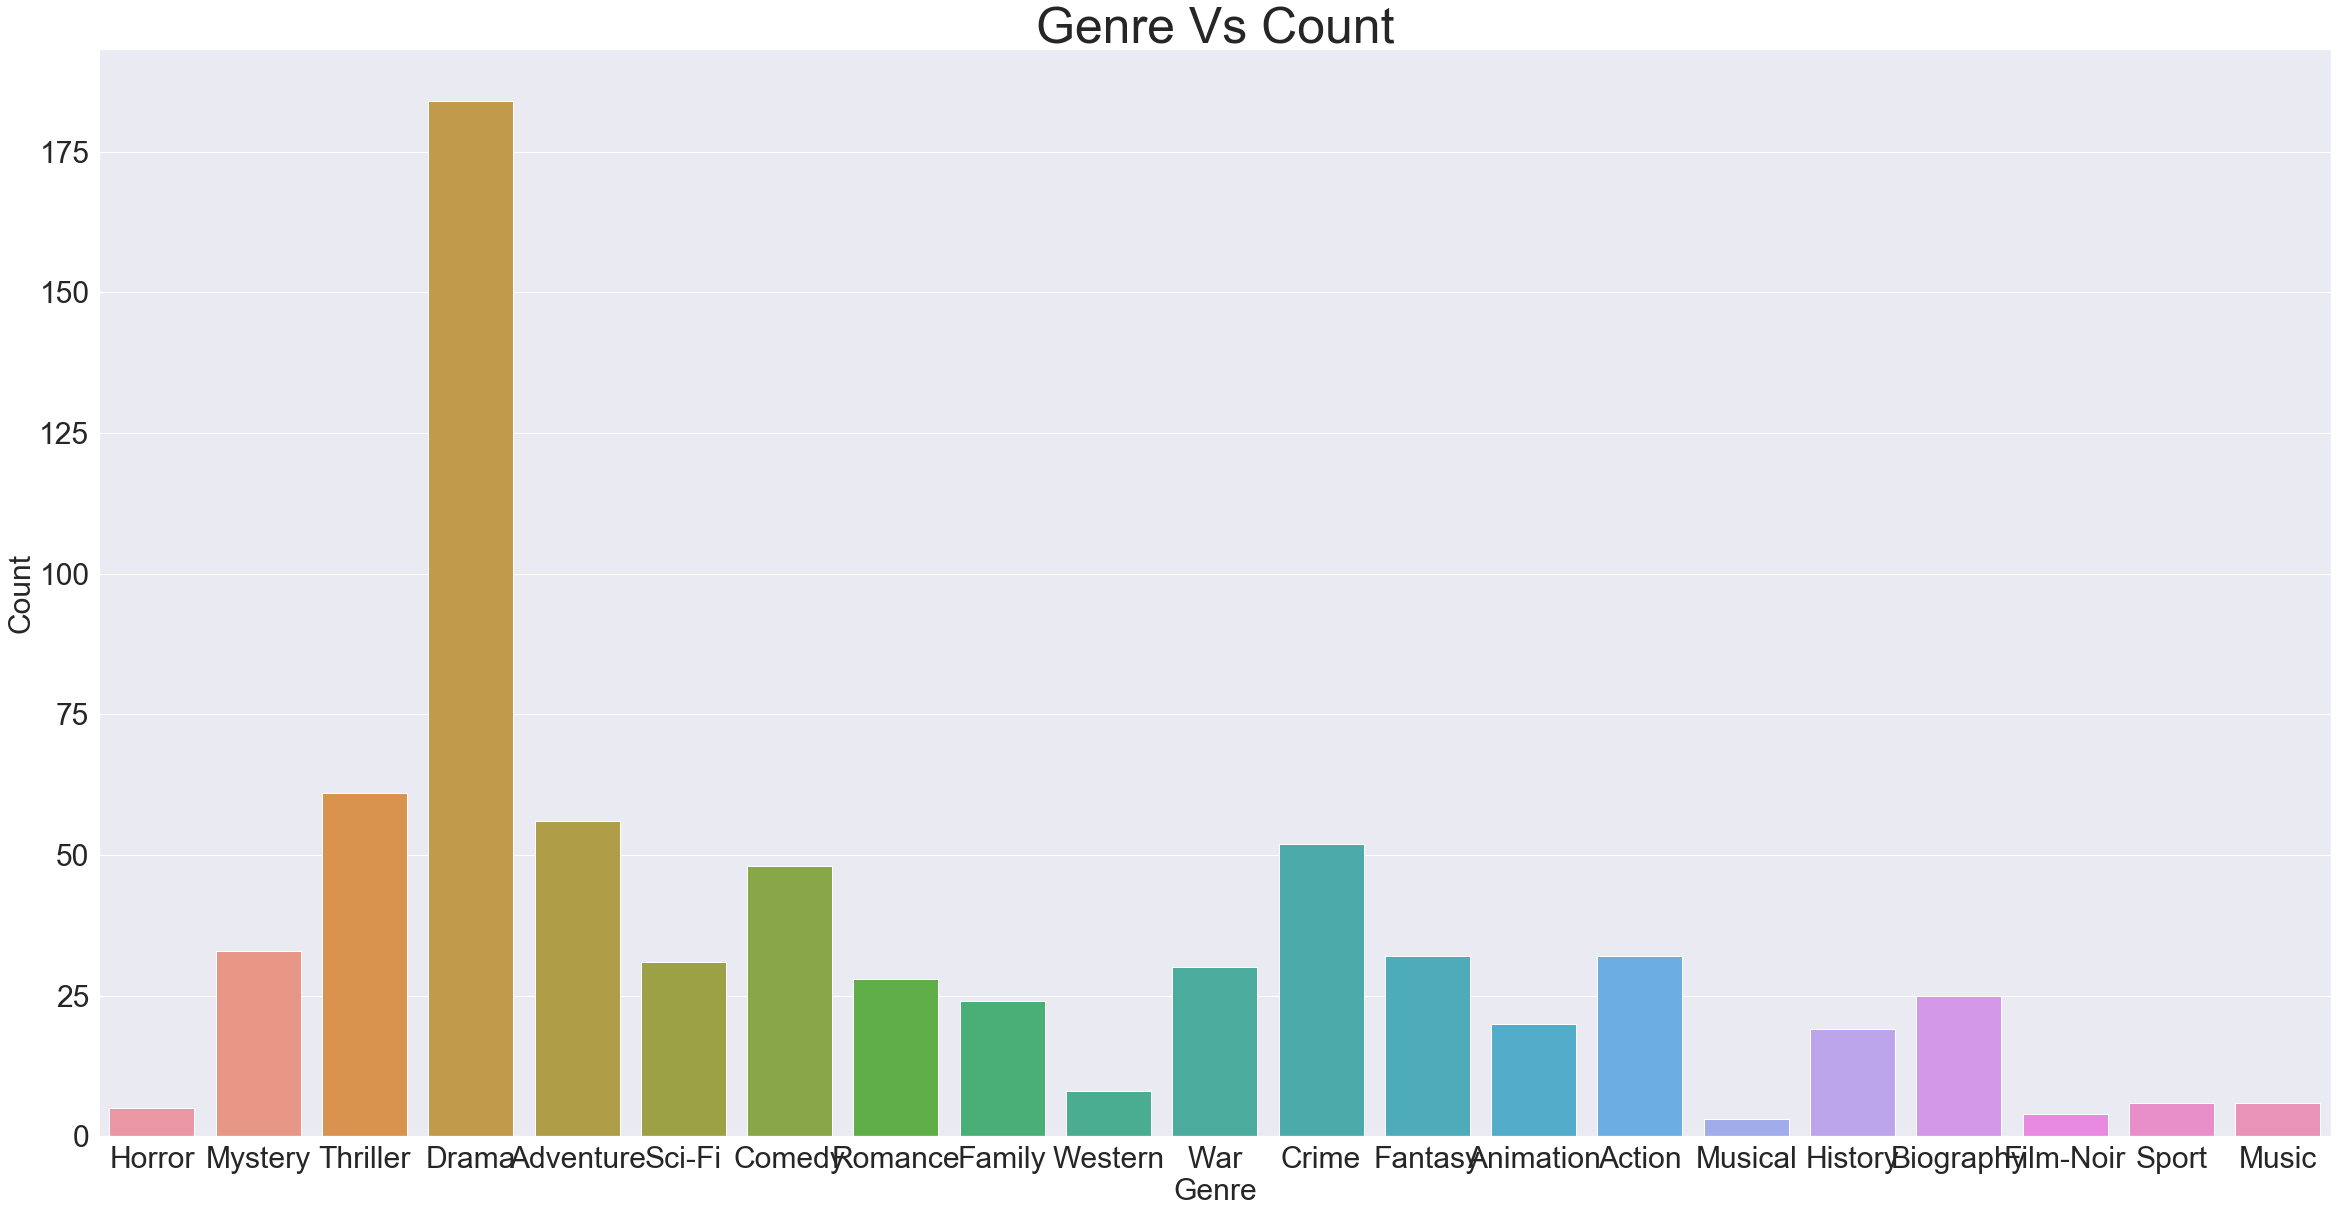

In [7]:
x = list()
y = list()
z = list()
for each in genre_count:
    x.append(each)
    y.append(genre_count[each][0])
    z.append(genre_count[each][1])
plt = sns.barplot(x, y)
sns.set(rc={'figure.figsize':(40,20)})
plt.axes.set_title("Genre Vs Count", fontsize=50)
plt.set_xlabel("Genre", fontsize=30)
plt.set_ylabel("Count", fontsize=30)
plt.tick_params(labelsize=30)

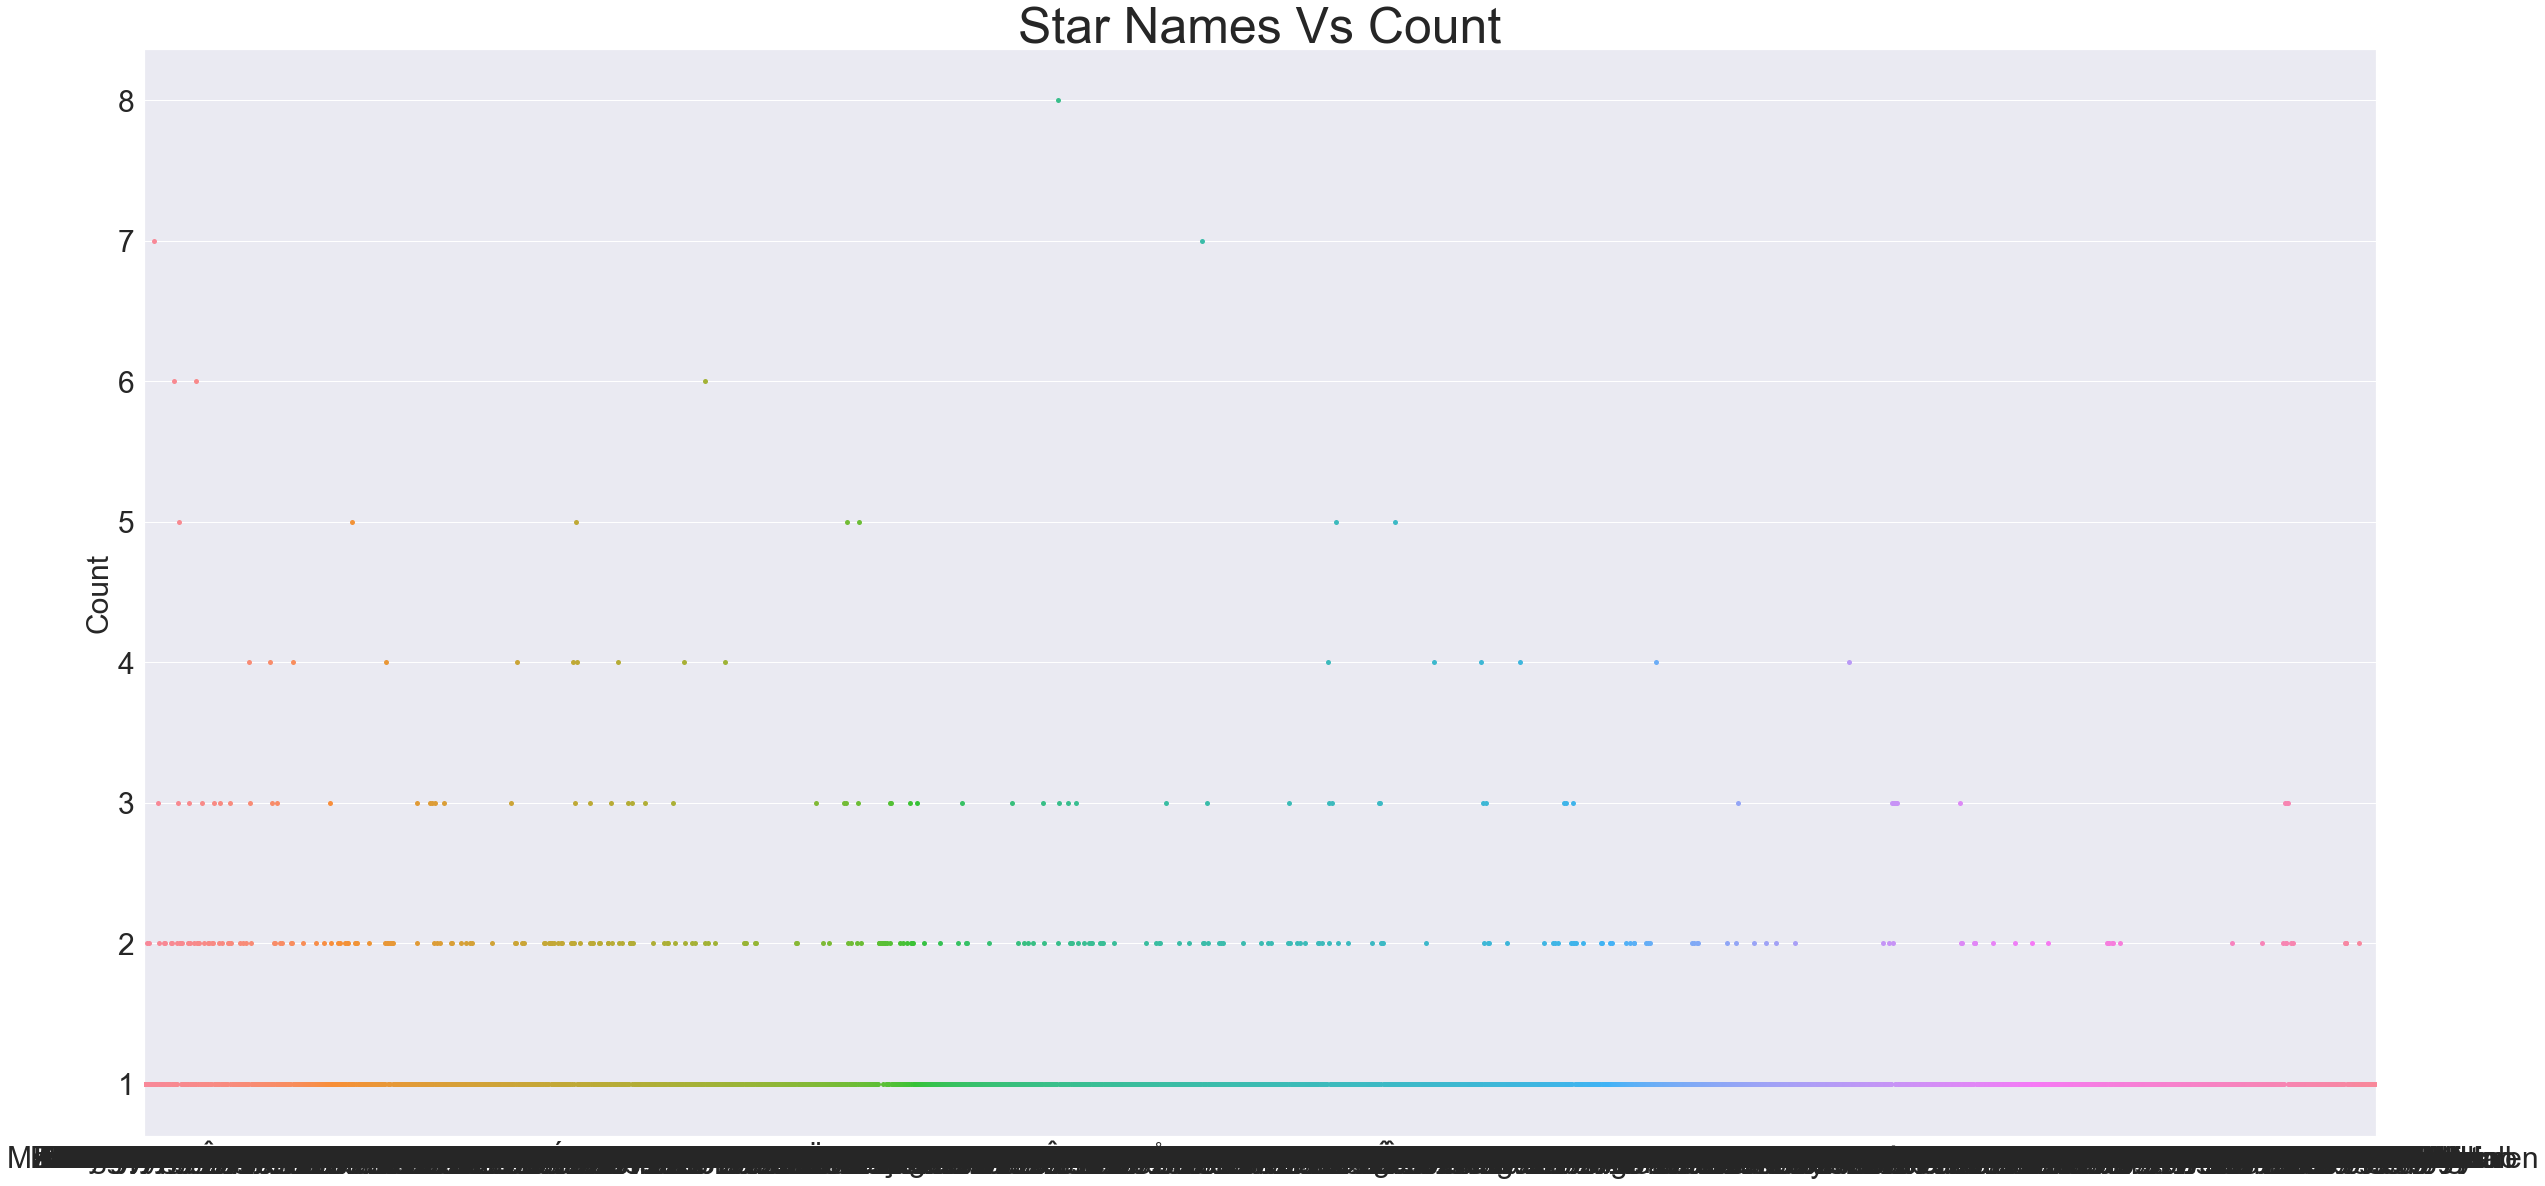

In [10]:
x = list()
y = list()
z = list()
for each in star_count:
    x.append(each)
    y.append(star_count[each][0])
    z.append(star_count[each][1])
plt = sns.stripplot(x, y)
sns.set(rc={'figure.figsize':(40,20)})
plt.axes.set_title("Star Names Vs Count", fontsize=50)
plt.set_ylabel("Count", fontsize=30)
plt.tick_params(labelsize=30)